> **DO NOT EDIT IF INSIDE course Github folder**


# Keras, overfitting, regularlization

- Part 4.1: Basic Keras
- Part 4.2: Regularization and overfitting

[**Feedback**]((https://ulfaslak.com/vent))

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

## Exercises

### Part 4.1: Basic Keras

> **Ex. 4.1.1** Let's get started with Keras by working with an actual neural network.
1. Implement a very simple `Sequential` model using [*Getting started with the Keras Sequential model*](https://keras.io/getting-started/sequential-model-guide/) as a guide.
2. Fit it to the [mnist](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset of handwritten digits that I have prepared below.
3. Compute the accuracy on the test set using the `evaluate` function.
4. BONUS: Can you score over 90% accuracy in just five training epochs?

In [4]:
(x, y), _ = keras.datasets.mnist.load_data()

# Reshape each image to 1dim vector. Effectively, reshape
# `x_train` from (60000, 28, 28) to (60000, 28*28)
x_train = x[:50000].reshape(-1, 28*28)
x_test = x[50000:].reshape(-1, 28*28)

# Convert y_train from vector of labels to one-hot encoding vector
y = keras.utils.to_categorical(y, num_classes=10)
y_train = y[:50000]
y_test = y[50000:]

**ANS**

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# 2
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(
    x_train, y_train,
    epochs=5, batch_size=32,
    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2s 39us/step - loss: 0.7015 - accuracy: 0.9277 - val_loss: 0.1557 - val_accuracy: 0.9591
Epoch 2/5
50000/50000 [==============================] - 2s 35us/step - loss: 0.1437 - accuracy: 0.9615 - val_loss: 0.1263 - val_accuracy: 0.9674
Epoch 3/5
50000/50000 [==============================] - 2s 36us/step - loss: 0.1231 - accuracy: 0.9667 - val_loss: 0.1203 - val_accuracy: 0.9707
Epoch 4/5
50000/50000 [==============================] - 2s 36us/step - loss: 0.1130 - accuracy: 0.9701 - val_loss: 0.1013 - val_accuracy: 0.9726
Epoch 5/5
50000/50000 [==============================] - 2s 37us/step - loss: 0.1065 - accuracy: 0.9711 - val_loss: 0.1112 - val_accuracy: 0.9715


In [7]:
# 3
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 15us/step


[0.11115571664571762, 0.9715296030044556]

In [ ]:
# 4. yes

> **Ex. 4.1.2** One of the coolest features we get basically for free when using Keras with the Tensorflow backend is the **Tensorboard**.
It allows us to visualize training and test curves, our network graph, and more, in an interactive format.
Below I have implemented a simple linear regression, adapt and launch a visualization of the training performance.

In [9]:
x = np.linspace(-1, 1, 101)
y = 3 * x + np.random.randn(*x.shape) * 0.33

model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, nb_epoch=50, verbose=1)

Epoch 1/50
101/101 [==============================] - 0s 381us/step - loss: 3.2693
Epoch 2/50
101/101 [==============================] - 0s 48us/step - loss: 3.0893
Epoch 3/50
101/101 [==============================] - 0s 70us/step - loss: 2.9357
Epoch 4/50
101/101 [==============================] - 0s 56us/step - loss: 2.7721
Epoch 5/50
101/101 [==============================] - 0s 63us/step - loss: 2.6532
Epoch 6/50
 32/101 [========>.....................] - ETA: 0s - loss: 2.1200

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


101/101 [==============================] - 0s 132us/step - loss: 2.5155
Epoch 7/50
101/101 [==============================] - 0s 116us/step - loss: 2.3646
Epoch 8/50
101/101 [==============================] - 0s 81us/step - loss: 2.2398
Epoch 9/50
101/101 [==============================] - 0s 70us/step - loss: 2.1259
Epoch 10/50
101/101 [==============================] - 0s 116us/step - loss: 2.0256
Epoch 11/50
101/101 [==============================] - 0s 74us/step - loss: 1.9227
Epoch 12/50
101/101 [==============================] - 0s 146us/step - loss: 1.8315
Epoch 13/50
101/101 [==============================] - 0s 80us/step - loss: 1.7445
Epoch 14/50
101/101 [==============================] - 0s 86us/step - loss: 1.6699
Epoch 15/50
101/101 [==============================] - 0s 97us/step - loss: 1.5896
Epoch 16/50
101/101 [==============================] - 0s 151us/step - loss: 1.5035
Epoch 17/50
101/101 [==============================] - 0s 69us/step - loss: 1.4298
Epoch 18/50
10

**ANS**

In [ ]:
import datetime, os

logdir = os.path.join("./logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=10)

x = np.linspace(-1, 1, 101)
y = 3 * x + np.random.randn(*x.shape) * 0.33

model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, nb_epoch=50, verbose=1, callbacks=[tensorboard_callback])

%load_ext tensorboard
%tensorboard --logdir logs

> **Ex. 4.1.3** Solve exercises x.2.2 and x.2.3 from week 2, but solve them using Keras.
> Comment on differences in speed (and outcome if you observe any).
You can for example use Tensorboard to inspect the training performance throught the training epochs.

**ANS.2.2**

In [31]:
from scipy.interpolate import interp1d

def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

def generate_X_nonlinear(N=200, R=5):
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

class cmap_in_range:
    """Create map to range of colors inside given domain.

    Example
    -------
    >>> cmap = cmap_in_range([0, 1])
    >>> cmap(0.1)
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_domain, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain = cmap_domain
        self.cmap_range = cmap_range
        self.m = interp1d(cmap_domain, cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, value):
        if not self.cmap_domain[0] <= value <= self.cmap_domain[1]:
            raise Exception("Value must be inside cmap_domain.")
        return self.cmap(self.m(value))

In [26]:
# Generate data
X_train, y_train = generate_X_linear(N=1e5)
X_test, y_test = generate_X_linear(N=1e4)

# Define model
model = Sequential()
model.add(Dense(input_dim=2, output_dim=1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mse')
model.fit(X_train, y_train.reshape(-1), nb_epoch=5, verbose=1)

Epoch 1/10
    32/100000 [..............................] - ETA: 2:08 - loss: 0.0289

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, activation="sigmoid", units=1)`
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


100000/100000 [==============================] - 2s 21us/step - loss: 0.0126
Epoch 2/10
100000/100000 [==============================] - 2s 20us/step - loss: 0.0055
Epoch 3/10
100000/100000 [==============================] - 2s 20us/step - loss: 0.0043: 0s - lo
Epoch 4/10
100000/100000 [==============================] - 2s 20us/step - loss: 0.0038
Epoch 5/10
100000/100000 [==============================] - 2s 21us/step - loss: 0.0035
Epoch 6/10
100000/100000 [==============================] - 2s 21us/step - loss: 0.0032
Epoch 7/10
100000/100000 [==============================] - 2s 21us/step - loss: 0.0031
Epoch 8/10
100000/100000 [==============================] - 2s 21us/step - loss: 0.0030
Epoch 9/10
100000/100000 [==============================] - 2s 20us/step - loss: 0.0029
Epoch 10/10
100000/100000 [==============================] - 2s 21us/step - loss: 0.0028


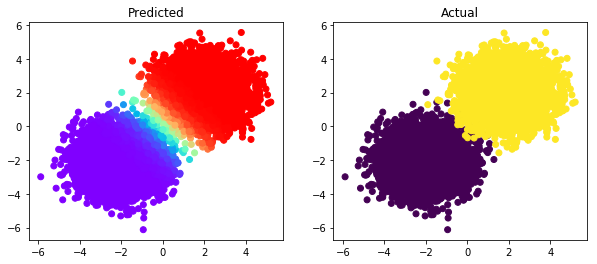

In [32]:
# Predict
y_pred = model.predict(X_test).reshape(-1)

# Visualize
cmap = cmap_in_range([0, 1])
prediction_colors = [cmap(v) for v in y_pred]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Predicted")
plt.scatter(X_test[:, 0], X_test[:, 1], c=prediction_colors)
plt.subplot(1, 2, 2)
plt.title("Actual")
plt.scatter(X_test[:, 0], X_test[:, 1], c=list(y_test.reshape(-1)))
plt.show()

**ANS.2.3**

In [41]:
# Generate data
X_train, y_train = generate_X_nonlinear(N=1e5)
X_test, y_test = generate_X_nonlinear(N=1e4)

# Define model
model = Sequential()
model.add(Dense(input_dim=2, output_dim=3, activation='sigmoid'))
model.add(Dense(input_dim=3, output_dim=1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mse')
model.fit(X_train, y_train.reshape(-1), nb_epoch=30, verbose=1)

Epoch 1/30
    32/100000 [..............................] - ETA: 2:47 - loss: 0.2479

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, activation="sigmoid", units=3)`
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=3, activation="sigmoid", units=1)`
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


100000/100000 [==============================] - 2s 23us/step - loss: 0.2434
Epoch 2/30
100000/100000 [==============================] - 2s 21us/step - loss: 0.2263
Epoch 3/30
100000/100000 [==============================] - 2s 22us/step - loss: 0.2035
Epoch 4/30
100000/100000 [==============================] - 2s 23us/step - loss: 0.1801
Epoch 5/30
100000/100000 [==============================] - 2s 23us/step - loss: 0.1615
Epoch 6/30
100000/100000 [==============================] - 2s 24us/step - loss: 0.1480
Epoch 7/30
100000/100000 [==============================] - 2s 25us/step - loss: 0.1383
Epoch 8/30
100000/100000 [==============================] - 3s 26us/step - loss: 0.1306
Epoch 9/30
100000/100000 [==============================] - 2s 21us/step - loss: 0.1234
Epoch 10/30
100000/100000 [==============================] - 2s 21us/step - loss: 0.1150
Epoch 11/30
100000/100000 [==============================] - 2s 21us/step - loss: 0.1040
Epoch 12/30
100000/100000 [==============

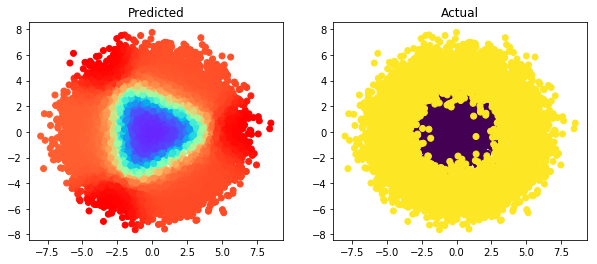

In [42]:
# Predict
y_pred = model.predict(X_test).reshape(-1)

# Visualize
cmap = cmap_in_range([0, 1])
prediction_colors = [cmap(v) for v in y_pred]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Predicted")
plt.scatter(X_test[:, 0], X_test[:, 1], c=prediction_colors)
plt.subplot(1, 2, 2)
plt.title("Actual")
plt.scatter(X_test[:, 0], X_test[:, 1], c=list(y_test.reshape(-1)))
plt.show()

### Part 3.1: Overfitting and regularization

When a model *overfits* it means that it memorizes the outcomes for each training data point rather than general patterns.
Thus an overfitted model will score extremely well on the training data but poorly on new unseen data. 
In general, the more flexible a model is the easier it will overfit, and for this reason neural networks are notorious overfitters.
Broadly speaking, the way to combat this is to *regularize* the network.

> **Ex. 4.2.1** To understand overfitting, we overfit some data! Let's fit a neural network to data that has no inherent patterns: *noise*.

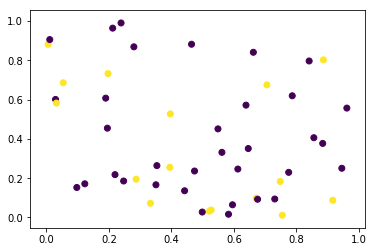

In [43]:
# Generate some data-points
x = np.random.random(size=(50, 2))

# And some random outcomes
y = np.random.randint(0, 2, size=(50, ))

# Plot it
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

> Now, create a network that attains an accuracy score over 80% in predicting which points are class 0 and which are class 1.
>
> *Hint*: The bigger the network, the bigger the overfitting.

**ANS**

In [85]:
# Define model
model = Sequential()
model.add(Dense(input_dim=2, output_dim=100, activation='relu'))
model.add(Dense(input_dim=100, output_dim=100, activation='relu'))
model.add(Dense(input_dim=100, output_dim=1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='mse', metrics=['accuracy'])
model.fit(x, y, nb_epoch=1000, verbose=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, activation="relu", units=100)`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="relu", units=100)`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="sigmoid", units=1)`
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.4600
Epoch 2/1000
50/50 [==============================] - 0s 86us/step - loss: 0.2199 - accuracy: 0.6800
Epoch 3/1000
50/50 [==============================] - 0s 69us/step - loss: 0.2228 - accuracy: 0.6800
Epoch 4/1000
50/50 [==============================] - 0s 66us/step - loss: 0.2217 - accuracy: 0.6800
Epoch 5/1000
50/50 [==============================] - 0s 74us/step - loss: 0.2149 - accuracy: 0.6800
Epoch 6/1000
50/50 [==============================] - 0s 105us/step - loss: 0.2153 - accuracy: 0.6800
Epoch 7/1000
50/50 [==============================] - 0s 118us/step - loss: 0.2155 - accuracy: 0.6800
Epoch 8/1000
50/50 [==============================] - 0s 137us/step - loss: 0.2153 - accuracy: 0.6800
Epoch 9/1000
50/50 [==============================] - 0s 134us/step - loss: 0.2145 - accuracy: 0.6800
Epoch 10/1000
50/50 [==============================] - 0s 98us/step - loss: 0.2142 - acc

50/50 [==============================] - 0s 90us/step - loss: 0.1855 - accuracy: 0.7000
Epoch 81/1000
50/50 [==============================] - 0s 95us/step - loss: 0.1834 - accuracy: 0.7200
Epoch 82/1000
50/50 [==============================] - 0s 146us/step - loss: 0.1848 - accuracy: 0.7200
Epoch 83/1000
50/50 [==============================] - 0s 80us/step - loss: 0.1825 - accuracy: 0.7200
Epoch 84/1000
50/50 [==============================] - 0s 179us/step - loss: 0.1816 - accuracy: 0.7400
Epoch 85/1000
50/50 [==============================] - 0s 118us/step - loss: 0.1819 - accuracy: 0.7000
Epoch 86/1000
50/50 [==============================] - 0s 170us/step - loss: 0.1819 - accuracy: 0.6800
Epoch 87/1000
50/50 [==============================] - 0s 99us/step - loss: 0.1816 - accuracy: 0.7000
Epoch 88/1000
50/50 [==============================] - 0s 89us/step - loss: 0.1856 - accuracy: 0.7000
Epoch 89/1000
50/50 [==============================] - 0s 121us/step - loss: 0.1819 - accura

50/50 [==============================] - 0s 74us/step - loss: 0.1609 - accuracy: 0.7600
Epoch 160/1000
50/50 [==============================] - 0s 93us/step - loss: 0.1604 - accuracy: 0.7600
Epoch 161/1000
50/50 [==============================] - 0s 92us/step - loss: 0.1604 - accuracy: 0.7600
Epoch 162/1000
50/50 [==============================] - 0s 99us/step - loss: 0.1630 - accuracy: 0.7600
Epoch 163/1000
50/50 [==============================] - 0s 107us/step - loss: 0.1594 - accuracy: 0.7600
Epoch 164/1000
50/50 [==============================] - 0s 107us/step - loss: 0.1598 - accuracy: 0.7600
Epoch 165/1000
50/50 [==============================] - 0s 86us/step - loss: 0.1608 - accuracy: 0.7600
Epoch 166/1000
50/50 [==============================] - 0s 99us/step - loss: 0.1622 - accuracy: 0.7200
Epoch 167/1000
50/50 [==============================] - 0s 99us/step - loss: 0.1587 - accuracy: 0.7200
Epoch 168/1000
50/50 [==============================] - 0s 130us/step - loss: 0.1589 -

50/50 [==============================] - 0s 81us/step - loss: 0.1364 - accuracy: 0.7600
Epoch 239/1000
50/50 [==============================] - 0s 92us/step - loss: 0.1276 - accuracy: 0.8000
Epoch 240/1000
50/50 [==============================] - 0s 126us/step - loss: 0.1239 - accuracy: 0.8200
Epoch 241/1000
50/50 [==============================] - 0s 89us/step - loss: 0.1336 - accuracy: 0.8000
Epoch 242/1000
50/50 [==============================] - 0s 76us/step - loss: 0.1286 - accuracy: 0.8000
Epoch 243/1000
50/50 [==============================] - 0s 116us/step - loss: 0.1256 - accuracy: 0.7800
Epoch 244/1000
50/50 [==============================] - 0s 80us/step - loss: 0.1327 - accuracy: 0.7800
Epoch 245/1000
50/50 [==============================] - 0s 127us/step - loss: 0.1270 - accuracy: 0.8000
Epoch 246/1000
50/50 [==============================] - 0s 110us/step - loss: 0.1364 - accuracy: 0.8000
Epoch 247/1000
50/50 [==============================] - 0s 117us/step - loss: 0.1255

50/50 [==============================] - 0s 244us/step - loss: 0.1106 - accuracy: 0.8200
Epoch 318/1000
50/50 [==============================] - 0s 122us/step - loss: 0.1058 - accuracy: 0.8600
Epoch 319/1000
50/50 [==============================] - 0s 86us/step - loss: 0.1133 - accuracy: 0.8400
Epoch 320/1000
50/50 [==============================] - 0s 90us/step - loss: 0.1103 - accuracy: 0.8600
Epoch 321/1000
50/50 [==============================] - 0s 119us/step - loss: 0.1079 - accuracy: 0.8600
Epoch 322/1000
50/50 [==============================] - 0s 113us/step - loss: 0.1106 - accuracy: 0.8400
Epoch 323/1000
50/50 [==============================] - 0s 142us/step - loss: 0.1071 - accuracy: 0.8400
Epoch 324/1000
50/50 [==============================] - 0s 93us/step - loss: 0.1069 - accuracy: 0.8400
Epoch 325/1000
50/50 [==============================] - 0s 69us/step - loss: 0.0997 - accuracy: 0.8600
Epoch 326/1000
50/50 [==============================] - 0s 121us/step - loss: 0.102

50/50 [==============================] - 0s 66us/step - loss: 0.0922 - accuracy: 0.8400
Epoch 397/1000
50/50 [==============================] - 0s 122us/step - loss: 0.1017 - accuracy: 0.8400
Epoch 398/1000
50/50 [==============================] - 0s 88us/step - loss: 0.0890 - accuracy: 0.8400
Epoch 399/1000
50/50 [==============================] - 0s 108us/step - loss: 0.0963 - accuracy: 0.8600
Epoch 400/1000
50/50 [==============================] - 0s 69us/step - loss: 0.0925 - accuracy: 0.8600
Epoch 401/1000
50/50 [==============================] - 0s 73us/step - loss: 0.0923 - accuracy: 0.8400
Epoch 402/1000
50/50 [==============================] - 0s 99us/step - loss: 0.0853 - accuracy: 0.8800
Epoch 403/1000
50/50 [==============================] - 0s 107us/step - loss: 0.0881 - accuracy: 0.8600
Epoch 404/1000
50/50 [==============================] - 0s 78us/step - loss: 0.0896 - accuracy: 0.9000
Epoch 405/1000
50/50 [==============================] - 0s 91us/step - loss: 0.0880 -

50/50 [==============================] - 0s 108us/step - loss: 0.1090 - accuracy: 0.8000
Epoch 476/1000
50/50 [==============================] - 0s 156us/step - loss: 0.0905 - accuracy: 0.8400
Epoch 477/1000
50/50 [==============================] - 0s 99us/step - loss: 0.0914 - accuracy: 0.8600
Epoch 478/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0841 - accuracy: 0.8400
Epoch 479/1000
50/50 [==============================] - 0s 102us/step - loss: 0.0856 - accuracy: 0.8800
Epoch 480/1000
50/50 [==============================] - 0s 198us/step - loss: 0.0813 - accuracy: 0.8800
Epoch 481/1000
50/50 [==============================] - 0s 69us/step - loss: 0.0919 - accuracy: 0.8400
Epoch 482/1000
50/50 [==============================] - 0s 146us/step - loss: 0.0898 - accuracy: 0.8200
Epoch 483/1000
50/50 [==============================] - 0s 95us/step - loss: 0.0803 - accuracy: 0.9000
Epoch 484/1000
50/50 [==============================] - 0s 133us/step - loss: 0.086

50/50 [==============================] - 0s 84us/step - loss: 0.0855 - accuracy: 0.8600
Epoch 555/1000
50/50 [==============================] - 0s 237us/step - loss: 0.0754 - accuracy: 0.8800
Epoch 556/1000
50/50 [==============================] - 0s 72us/step - loss: 0.0857 - accuracy: 0.8400
Epoch 557/1000
50/50 [==============================] - 0s 84us/step - loss: 0.0832 - accuracy: 0.8600
Epoch 558/1000
50/50 [==============================] - 0s 109us/step - loss: 0.0897 - accuracy: 0.8800
Epoch 559/1000
50/50 [==============================] - 0s 84us/step - loss: 0.0956 - accuracy: 0.8800
Epoch 560/1000
50/50 [==============================] - 0s 128us/step - loss: 0.0924 - accuracy: 0.8400
Epoch 561/1000
50/50 [==============================] - 0s 211us/step - loss: 0.1084 - accuracy: 0.7800
Epoch 562/1000
50/50 [==============================] - 0s 87us/step - loss: 0.0895 - accuracy: 0.8600
Epoch 563/1000
50/50 [==============================] - 0s 83us/step - loss: 0.0827 

50/50 [==============================] - 0s 129us/step - loss: 0.0835 - accuracy: 0.8600
Epoch 634/1000
50/50 [==============================] - 0s 150us/step - loss: 0.0895 - accuracy: 0.8800
Epoch 635/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0845 - accuracy: 0.8800
Epoch 636/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0760 - accuracy: 0.9000
Epoch 637/1000
50/50 [==============================] - 0s 91us/step - loss: 0.0893 - accuracy: 0.8600
Epoch 638/1000
50/50 [==============================] - 0s 59us/step - loss: 0.0849 - accuracy: 0.8600
Epoch 639/1000
50/50 [==============================] - 0s 96us/step - loss: 0.0952 - accuracy: 0.8000
Epoch 640/1000
50/50 [==============================] - 0s 82us/step - loss: 0.0805 - accuracy: 0.8600
Epoch 641/1000
50/50 [==============================] - 0s 85us/step - loss: 0.0778 - accuracy: 0.8800
Epoch 642/1000
50/50 [==============================] - 0s 134us/step - loss: 0.0769 

50/50 [==============================] - 0s 121us/step - loss: 0.0697 - accuracy: 0.9000
Epoch 713/1000
50/50 [==============================] - 0s 66us/step - loss: 0.0737 - accuracy: 0.9000
Epoch 714/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0800 - accuracy: 0.8400
Epoch 715/1000
50/50 [==============================] - 0s 89us/step - loss: 0.0702 - accuracy: 0.8800
Epoch 716/1000
50/50 [==============================] - 0s 91us/step - loss: 0.0673 - accuracy: 0.9000
Epoch 717/1000
50/50 [==============================] - 0s 74us/step - loss: 0.0730 - accuracy: 0.9000
Epoch 718/1000
50/50 [==============================] - 0s 112us/step - loss: 0.0739 - accuracy: 0.9000
Epoch 719/1000
50/50 [==============================] - 0s 121us/step - loss: 0.0695 - accuracy: 0.8600
Epoch 720/1000
50/50 [==============================] - 0s 98us/step - loss: 0.0699 - accuracy: 0.8600
Epoch 721/1000
50/50 [==============================] - 0s 123us/step - loss: 0.0697

50/50 [==============================] - 0s 73us/step - loss: 0.0736 - accuracy: 0.8800
Epoch 792/1000
50/50 [==============================] - 0s 98us/step - loss: 0.0657 - accuracy: 0.9000
Epoch 793/1000
50/50 [==============================] - 0s 104us/step - loss: 0.0793 - accuracy: 0.8800
Epoch 794/1000
50/50 [==============================] - 0s 174us/step - loss: 0.0864 - accuracy: 0.8800
Epoch 795/1000
50/50 [==============================] - 0s 103us/step - loss: 0.0785 - accuracy: 0.8800
Epoch 796/1000
50/50 [==============================] - 0s 76us/step - loss: 0.0637 - accuracy: 0.9200
Epoch 797/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0861 - accuracy: 0.8800
Epoch 798/1000
50/50 [==============================] - 0s 81us/step - loss: 0.0798 - accuracy: 0.8800
Epoch 799/1000
50/50 [==============================] - 0s 76us/step - loss: 0.0751 - accuracy: 0.8600
Epoch 800/1000
50/50 [==============================] - 0s 109us/step - loss: 0.0824

50/50 [==============================] - 0s 133us/step - loss: 0.0643 - accuracy: 0.9000
Epoch 871/1000
50/50 [==============================] - 0s 129us/step - loss: 0.0649 - accuracy: 0.8800
Epoch 872/1000
50/50 [==============================] - 0s 152us/step - loss: 0.0657 - accuracy: 0.9000
Epoch 873/1000
50/50 [==============================] - 0s 130us/step - loss: 0.0665 - accuracy: 0.9200
Epoch 874/1000
50/50 [==============================] - 0s 75us/step - loss: 0.0676 - accuracy: 0.8600
Epoch 875/1000
50/50 [==============================] - 0s 87us/step - loss: 0.0704 - accuracy: 0.8800
Epoch 876/1000
50/50 [==============================] - 0s 245us/step - loss: 0.0690 - accuracy: 0.9000
Epoch 877/1000
50/50 [==============================] - 0s 88us/step - loss: 0.0704 - accuracy: 0.8800
Epoch 878/1000
50/50 [==============================] - 0s 89us/step - loss: 0.0628 - accuracy: 0.9200
Epoch 879/1000
50/50 [==============================] - 0s 134us/step - loss: 0.065

50/50 [==============================] - 0s 144us/step - loss: 0.0721 - accuracy: 0.9000
Epoch 950/1000
50/50 [==============================] - 0s 148us/step - loss: 0.0587 - accuracy: 0.9200
Epoch 951/1000
50/50 [==============================] - 0s 138us/step - loss: 0.0634 - accuracy: 0.8800
Epoch 952/1000
50/50 [==============================] - 0s 84us/step - loss: 0.0740 - accuracy: 0.8800
Epoch 953/1000
50/50 [==============================] - 0s 137us/step - loss: 0.0699 - accuracy: 0.9000
Epoch 954/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0615 - accuracy: 0.9000
Epoch 955/1000
50/50 [==============================] - 0s 238us/step - loss: 0.0666 - accuracy: 0.9000
Epoch 956/1000
50/50 [==============================] - 0s 89us/step - loss: 0.0664 - accuracy: 0.8800
Epoch 957/1000
50/50 [==============================] - 0s 134us/step - loss: 0.0663 - accuracy: 0.9200
Epoch 958/1000
50/50 [==============================] - 0s 116us/step - loss: 0.0

In [86]:
model.evaluate(x, y)

50/50 [==============================] - 0s 431us/step


[0.0699293041229248, 0.9200000166893005]

> **Ex 4.2.2** Norm regularization:
> 1. Apply L2 regularization to your network so that it, across the same number of batches, cannot overfit.
> 2. What does L2 regularization do? Compare the absolute size of weights in the unregularized and regularized model.
>
> *Hint:* `model.weights` will give you a list of weights and bias arrays for each layer. They are in a Tensorflow format but you can call `.numpy()` on them to get them out as numpy arrays.

**ANS 1**

In [90]:
# Define model
model_regul = Sequential()
model_regul.add(Dense(input_dim=2, output_dim=100, activation='relu'))
model_regul.add(Dense(input_dim=100, output_dim=100, activation='relu'))
model_regul.add(Dense(input_dim=100, output_dim=1, activation='sigmoid'))
model_regul.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2, decay=1e-1), loss='mse', metrics=['accuracy'])
model_regul.fit(x, y, nb_epoch=1000, verbose=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, activation="relu", units=100)`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="relu", units=100)`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="sigmoid", units=1)`
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.6800
Epoch 2/1000
50/50 [==============================] - 0s 78us/step - loss: 0.2169 - accuracy: 0.6800
Epoch 3/1000
50/50 [==============================] - 0s 69us/step - loss: 0.2172 - accuracy: 0.6800
Epoch 4/1000
50/50 [==============================] - 0s 74us/step - loss: 0.2209 - accuracy: 0.6800
Epoch 5/1000
50/50 [==============================] - 0s 108us/step - loss: 0.2226 - accuracy: 0.6800
Epoch 6/1000
50/50 [==============================] - 0s 87us/step - loss: 0.2189 - accuracy: 0.6800
Epoch 7/1000
50/50 [==============================] - 0s 93us/step - loss: 0.2164 - accuracy: 0.6800
Epoch 8/1000
50/50 [==============================] - 0s 174us/step - loss: 0.2149 - accuracy: 0.6800
Epoch 9/1000
50/50 [==============================] - 0s 174us/step - loss: 0.2138 - accuracy: 0.6800
Epoch 10/1000
50/50 [==============================] - 0s 171us/step - loss: 0.2129 - acc

50/50 [==============================] - 0s 104us/step - loss: 0.2008 - accuracy: 0.7000
Epoch 81/1000
50/50 [==============================] - 0s 81us/step - loss: 0.2007 - accuracy: 0.7000
Epoch 82/1000
50/50 [==============================] - 0s 67us/step - loss: 0.2007 - accuracy: 0.7000
Epoch 83/1000
50/50 [==============================] - 0s 73us/step - loss: 0.2006 - accuracy: 0.7000
Epoch 84/1000
50/50 [==============================] - 0s 72us/step - loss: 0.2005 - accuracy: 0.7000
Epoch 85/1000
50/50 [==============================] - 0s 74us/step - loss: 0.2005 - accuracy: 0.7000
Epoch 86/1000
50/50 [==============================] - 0s 118us/step - loss: 0.2004 - accuracy: 0.7000
Epoch 87/1000
50/50 [==============================] - 0s 90us/step - loss: 0.2003 - accuracy: 0.7000
Epoch 88/1000
50/50 [==============================] - 0s 79us/step - loss: 0.2002 - accuracy: 0.7000
Epoch 89/1000
50/50 [==============================] - 0s 142us/step - loss: 0.2002 - accuracy

50/50 [==============================] - 0s 94us/step - loss: 0.1972 - accuracy: 0.7000
Epoch 160/1000
50/50 [==============================] - 0s 88us/step - loss: 0.1972 - accuracy: 0.7000
Epoch 161/1000
50/50 [==============================] - 0s 140us/step - loss: 0.1972 - accuracy: 0.7000
Epoch 162/1000
50/50 [==============================] - 0s 103us/step - loss: 0.1971 - accuracy: 0.7000
Epoch 163/1000
50/50 [==============================] - 0s 98us/step - loss: 0.1971 - accuracy: 0.7000
Epoch 164/1000
50/50 [==============================] - 0s 84us/step - loss: 0.1971 - accuracy: 0.7000
Epoch 165/1000
50/50 [==============================] - 0s 96us/step - loss: 0.1971 - accuracy: 0.6800
Epoch 166/1000
50/50 [==============================] - 0s 89us/step - loss: 0.1971 - accuracy: 0.6800
Epoch 167/1000
50/50 [==============================] - 0s 79us/step - loss: 0.1971 - accuracy: 0.7000
Epoch 168/1000
50/50 [==============================] - 0s 127us/step - loss: 0.1970 -

50/50 [==============================] - 0s 113us/step - loss: 0.1958 - accuracy: 0.7200
Epoch 239/1000
50/50 [==============================] - 0s 116us/step - loss: 0.1958 - accuracy: 0.7200
Epoch 240/1000
50/50 [==============================] - 0s 124us/step - loss: 0.1958 - accuracy: 0.7200
Epoch 241/1000
50/50 [==============================] - 0s 70us/step - loss: 0.1958 - accuracy: 0.7200
Epoch 242/1000
50/50 [==============================] - 0s 84us/step - loss: 0.1958 - accuracy: 0.7200
Epoch 243/1000
50/50 [==============================] - 0s 113us/step - loss: 0.1958 - accuracy: 0.7200
Epoch 244/1000
50/50 [==============================] - 0s 89us/step - loss: 0.1958 - accuracy: 0.7200
Epoch 245/1000
50/50 [==============================] - 0s 130us/step - loss: 0.1958 - accuracy: 0.7200
Epoch 246/1000
50/50 [==============================] - 0s 74us/step - loss: 0.1957 - accuracy: 0.7200
Epoch 247/1000
50/50 [==============================] - 0s 78us/step - loss: 0.1958

50/50 [==============================] - 0s 132us/step - loss: 0.1951 - accuracy: 0.7200
Epoch 318/1000
50/50 [==============================] - 0s 116us/step - loss: 0.1951 - accuracy: 0.7200
Epoch 319/1000
50/50 [==============================] - 0s 120us/step - loss: 0.1951 - accuracy: 0.7200
Epoch 320/1000
50/50 [==============================] - 0s 128us/step - loss: 0.1951 - accuracy: 0.7200
Epoch 321/1000
50/50 [==============================] - 0s 115us/step - loss: 0.1951 - accuracy: 0.7200
Epoch 322/1000
50/50 [==============================] - 0s 113us/step - loss: 0.1950 - accuracy: 0.7200
Epoch 323/1000
50/50 [==============================] - 0s 221us/step - loss: 0.1950 - accuracy: 0.7200
Epoch 324/1000
50/50 [==============================] - 0s 104us/step - loss: 0.1951 - accuracy: 0.7200
Epoch 325/1000
50/50 [==============================] - 0s 133us/step - loss: 0.1950 - accuracy: 0.7200
Epoch 326/1000
50/50 [==============================] - 0s 147us/step - loss: 0

50/50 [==============================] - 0s 90us/step - loss: 0.1945 - accuracy: 0.7200
Epoch 397/1000
50/50 [==============================] - 0s 232us/step - loss: 0.1945 - accuracy: 0.7200
Epoch 398/1000
50/50 [==============================] - 0s 96us/step - loss: 0.1945 - accuracy: 0.7200
Epoch 399/1000
50/50 [==============================] - 0s 88us/step - loss: 0.1945 - accuracy: 0.7200
Epoch 400/1000
50/50 [==============================] - 0s 88us/step - loss: 0.1945 - accuracy: 0.7200
Epoch 401/1000
50/50 [==============================] - 0s 138us/step - loss: 0.1945 - accuracy: 0.7200
Epoch 402/1000
50/50 [==============================] - 0s 234us/step - loss: 0.1945 - accuracy: 0.7200
Epoch 403/1000
50/50 [==============================] - 0s 116us/step - loss: 0.1945 - accuracy: 0.7200
Epoch 404/1000
50/50 [==============================] - 0s 120us/step - loss: 0.1945 - accuracy: 0.7200
Epoch 405/1000
50/50 [==============================] - 0s 94us/step - loss: 0.1945

50/50 [==============================] - 0s 205us/step - loss: 0.1942 - accuracy: 0.7200
Epoch 476/1000
50/50 [==============================] - 0s 77us/step - loss: 0.1942 - accuracy: 0.7200
Epoch 477/1000
50/50 [==============================] - 0s 138us/step - loss: 0.1942 - accuracy: 0.7200
Epoch 478/1000
50/50 [==============================] - 0s 106us/step - loss: 0.1941 - accuracy: 0.7200
Epoch 479/1000
50/50 [==============================] - 0s 101us/step - loss: 0.1942 - accuracy: 0.7200
Epoch 480/1000
50/50 [==============================] - 0s 84us/step - loss: 0.1941 - accuracy: 0.7200
Epoch 481/1000
50/50 [==============================] - 0s 105us/step - loss: 0.1941 - accuracy: 0.7200
Epoch 482/1000
50/50 [==============================] - 0s 71us/step - loss: 0.1941 - accuracy: 0.7200
Epoch 483/1000
50/50 [==============================] - 0s 87us/step - loss: 0.1941 - accuracy: 0.7200
Epoch 484/1000
50/50 [==============================] - 0s 80us/step - loss: 0.1941

50/50 [==============================] - 0s 137us/step - loss: 0.1939 - accuracy: 0.7200
Epoch 555/1000
50/50 [==============================] - 0s 77us/step - loss: 0.1939 - accuracy: 0.7200
Epoch 556/1000
50/50 [==============================] - 0s 69us/step - loss: 0.1939 - accuracy: 0.7200
Epoch 557/1000
50/50 [==============================] - 0s 146us/step - loss: 0.1939 - accuracy: 0.7200
Epoch 558/1000
50/50 [==============================] - 0s 102us/step - loss: 0.1939 - accuracy: 0.7200
Epoch 559/1000
50/50 [==============================] - 0s 91us/step - loss: 0.1939 - accuracy: 0.7200
Epoch 560/1000
50/50 [==============================] - 0s 134us/step - loss: 0.1939 - accuracy: 0.7200
Epoch 561/1000
50/50 [==============================] - 0s 138us/step - loss: 0.1939 - accuracy: 0.7200
Epoch 562/1000
50/50 [==============================] - 0s 86us/step - loss: 0.1939 - accuracy: 0.7200
Epoch 563/1000
50/50 [==============================] - 0s 74us/step - loss: 0.1938

50/50 [==============================] - 0s 87us/step - loss: 0.1937 - accuracy: 0.7200
Epoch 634/1000
50/50 [==============================] - 0s 213us/step - loss: 0.1937 - accuracy: 0.7200
Epoch 635/1000
50/50 [==============================] - 0s 79us/step - loss: 0.1937 - accuracy: 0.7200
Epoch 636/1000
50/50 [==============================] - 0s 82us/step - loss: 0.1937 - accuracy: 0.7200
Epoch 637/1000
50/50 [==============================] - 0s 127us/step - loss: 0.1937 - accuracy: 0.7200
Epoch 638/1000
50/50 [==============================] - 0s 97us/step - loss: 0.1937 - accuracy: 0.7200
Epoch 639/1000
50/50 [==============================] - 0s 132us/step - loss: 0.1936 - accuracy: 0.7200
Epoch 640/1000
50/50 [==============================] - 0s 105us/step - loss: 0.1937 - accuracy: 0.7200
Epoch 641/1000
50/50 [==============================] - 0s 125us/step - loss: 0.1937 - accuracy: 0.7200
Epoch 642/1000
50/50 [==============================] - 0s 71us/step - loss: 0.1936

50/50 [==============================] - 0s 120us/step - loss: 0.1935 - accuracy: 0.7200
Epoch 712/1000
50/50 [==============================] - 0s 71us/step - loss: 0.1935 - accuracy: 0.7200
Epoch 713/1000
50/50 [==============================] - 0s 76us/step - loss: 0.1935 - accuracy: 0.7200
Epoch 714/1000
50/50 [==============================] - 0s 71us/step - loss: 0.1935 - accuracy: 0.7200
Epoch 715/1000
50/50 [==============================] - 0s 95us/step - loss: 0.1935 - accuracy: 0.7200
Epoch 716/1000
50/50 [==============================] - 0s 87us/step - loss: 0.1935 - accuracy: 0.7200
Epoch 717/1000
50/50 [==============================] - 0s 103us/step - loss: 0.1935 - accuracy: 0.7200
Epoch 718/1000
50/50 [==============================] - 0s 78us/step - loss: 0.1935 - accuracy: 0.7200
Epoch 719/1000
50/50 [==============================] - 0s 101us/step - loss: 0.1935 - accuracy: 0.7200
Epoch 720/1000
50/50 [==============================] - 0s 101us/step - loss: 0.1935 

50/50 [==============================] - 0s 164us/step - loss: 0.1934 - accuracy: 0.7200
Epoch 791/1000
50/50 [==============================] - 0s 97us/step - loss: 0.1934 - accuracy: 0.7200
Epoch 792/1000
50/50 [==============================] - 0s 131us/step - loss: 0.1934 - accuracy: 0.7200
Epoch 793/1000
50/50 [==============================] - 0s 210us/step - loss: 0.1934 - accuracy: 0.7200
Epoch 794/1000
50/50 [==============================] - 0s 128us/step - loss: 0.1934 - accuracy: 0.7200
Epoch 795/1000
50/50 [==============================] - 0s 113us/step - loss: 0.1934 - accuracy: 0.7200
Epoch 796/1000
50/50 [==============================] - 0s 77us/step - loss: 0.1934 - accuracy: 0.7200
Epoch 797/1000
50/50 [==============================] - 0s 121us/step - loss: 0.1934 - accuracy: 0.7200
Epoch 798/1000
50/50 [==============================] - 0s 100us/step - loss: 0.1934 - accuracy: 0.7200
Epoch 799/1000
50/50 [==============================] - 0s 93us/step - loss: 0.19

50/50 [==============================] - 0s 84us/step - loss: 0.1933 - accuracy: 0.7200
Epoch 870/1000
50/50 [==============================] - 0s 101us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 871/1000
50/50 [==============================] - 0s 97us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 872/1000
50/50 [==============================] - 0s 120us/step - loss: 0.1933 - accuracy: 0.7200
Epoch 873/1000
50/50 [==============================] - 0s 96us/step - loss: 0.1933 - accuracy: 0.7200
Epoch 874/1000
50/50 [==============================] - 0s 103us/step - loss: 0.1933 - accuracy: 0.7200
Epoch 875/1000
50/50 [==============================] - 0s 84us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 876/1000
50/50 [==============================] - 0s 96us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 877/1000
50/50 [==============================] - 0s 132us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 878/1000
50/50 [==============================] - 0s 119us/step - loss: 0.1932

50/50 [==============================] - 0s 70us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 949/1000
50/50 [==============================] - 0s 123us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 950/1000
50/50 [==============================] - 0s 128us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 951/1000
50/50 [==============================] - 0s 134us/step - loss: 0.1931 - accuracy: 0.7200
Epoch 952/1000
50/50 [==============================] - 0s 89us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 953/1000
50/50 [==============================] - 0s 91us/step - loss: 0.1931 - accuracy: 0.7200
Epoch 954/1000
50/50 [==============================] - 0s 75us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 955/1000
50/50 [==============================] - 0s 93us/step - loss: 0.1932 - accuracy: 0.7200
Epoch 956/1000
50/50 [==============================] - 0s 99us/step - loss: 0.1931 - accuracy: 0.7200
Epoch 957/1000
50/50 [==============================] - 0s 80us/step - loss: 0.1932 -

**ANS 2**

In [91]:
# Unregularized absolute weight means
[np.mean(abs(w.numpy())) for w in model.weights]

[0.35729218, 0.1224937, 0.21117614, 0.15601085, 0.47405723, 0.14215052]

In [92]:
# Regularized absolute weight means
[np.mean(abs(w.numpy())) for w in model_regul.weights]

[0.1562283, 0.032063976, 0.0959937, 0.03517509, 0.13524793, 0.054101523]

Weights of regularized model are much closer to zero

> **Ex 4.2.3** Early stopping: Often we like to monitor the model's performance on a test set also while we train the model.
This allows us to do something called "early stopping" which is a way of regularizing by stopping the training process before the network overfits (we know it overfits when the performance on the training set starts getting much better than on the test set).
Implement early stopping when training on the random data above. What accuracy do you get?
>
> *Hint*: There's an example [here](https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore).

In [93]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Dense(input_dim=2, output_dim=100, activation='relu'))
model.add(Dense(input_dim=100, output_dim=100, activation='relu'))
model.add(Dense(input_dim=100, output_dim=1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='mse', metrics=['accuracy'])

model.fit(x, y, nb_epoch=1000, validation_split=0.2, callbacks=[early_stopping])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, activation="relu", units=100)`
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="relu", units=100)`
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="sigmoid", units=1)`
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 40 samples, validate on 10 samples
Epoch 1/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.6500 - val_loss: 0.1864 - val_accuracy: 0.8000
Epoch 2/1000
40/40 [==============================] - 0s 157us/step - loss: 0.2225 - accuracy: 0.6500 - val_loss: 0.1683 - val_accuracy: 0.8000
Epoch 3/1000
40/40 [==============================] - 0s 142us/step - loss: 0.2311 - accuracy: 0.6500 - val_loss: 0.1674 - val_accuracy: 0.8000
Epoch 4/1000
40/40 [==============================] - 0s 215us/step - loss: 0.2320 - accuracy: 0.6500 - val_loss: 0.1772 - val_accuracy: 0.8000
Epoch 5/1000
40/40 [==============================] - 0s 149us/step - loss: 0.2238 - accuracy: 0.6500 - val_loss: 0.2081 - val_accuracy: 0.8000


It pretty much just stops right away!

> **Ex 4.2.4** Dropout: Another clever way to regularize a network, is to randomly "drop out" some fraction of neurons during each training batch, so the network cannot store memory in specific neurons. The method is called Dropout. Go ahead and take your overfitting model and apply dropout in one or more of the layers and comment on the performance.
>
> *Hint*: Check out the reference [here](https://keras.io/layers/core/#dropout).

In [94]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Dense(input_dim=2, output_dim=100, activation='relu'))
model.add(Dense(input_dim=100, output_dim=100, activation='relu'))
model.add(keras.layers.Dropout(0.8, noise_shape=None, seed=None))
model.add(Dense(input_dim=100, output_dim=1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='mse', metrics=['accuracy'])

model.fit(x, y, nb_epoch=1000)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, activation="relu", units=100)`
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="relu", units=100)`
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="sigmoid", units=1)`
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.4600
Epoch 2/1000
50/50 [==============================] - 0s 78us/step - loss: 0.2317 - accuracy: 0.6800
Epoch 3/1000
50/50 [==============================] - 0s 86us/step - loss: 0.2209 - accuracy: 0.6800
Epoch 4/1000
50/50 [==============================] - 0s 80us/step - loss: 0.2318 - accuracy: 0.6800
Epoch 5/1000
50/50 [==============================] - 0s 115us/step - loss: 0.2181 - accuracy: 0.6800
Epoch 6/1000
50/50 [==============================] - 0s 133us/step - loss: 0.2291 - accuracy: 0.6800
Epoch 7/1000
50/50 [==============================] - 0s 217us/step - loss: 0.2428 - accuracy: 0.6600
Epoch 8/1000
50/50 [==============================] - 0s 118us/step - loss: 0.2425 - accuracy: 0.6800
Epoch 9/1000
50/50 [==============================] - 0s 135us/step - loss: 0.2263 - accuracy: 0.6800
Epoch 10/1000
50/50 [==============================] - 0s 123us/step - loss: 0.2329 - a

50/50 [==============================] - 0s 81us/step - loss: 0.1925 - accuracy: 0.6800
Epoch 81/1000
50/50 [==============================] - 0s 76us/step - loss: 0.1998 - accuracy: 0.6600
Epoch 82/1000
50/50 [==============================] - 0s 115us/step - loss: 0.2108 - accuracy: 0.6600
Epoch 83/1000
50/50 [==============================] - 0s 116us/step - loss: 0.2142 - accuracy: 0.6000
Epoch 84/1000
50/50 [==============================] - 0s 95us/step - loss: 0.2047 - accuracy: 0.6800
Epoch 85/1000
50/50 [==============================] - 0s 115us/step - loss: 0.2084 - accuracy: 0.6600
Epoch 86/1000
50/50 [==============================] - 0s 131us/step - loss: 0.1957 - accuracy: 0.7000
Epoch 87/1000
50/50 [==============================] - 0s 103us/step - loss: 0.2037 - accuracy: 0.7400
Epoch 88/1000
50/50 [==============================] - 0s 118us/step - loss: 0.1934 - accuracy: 0.6600
Epoch 89/1000
50/50 [==============================] - 0s 103us/step - loss: 0.2127 - accu

50/50 [==============================] - 0s 105us/step - loss: 0.2099 - accuracy: 0.6600
Epoch 160/1000
50/50 [==============================] - 0s 146us/step - loss: 0.1999 - accuracy: 0.6800
Epoch 161/1000
50/50 [==============================] - 0s 197us/step - loss: 0.1890 - accuracy: 0.7000
Epoch 162/1000
50/50 [==============================] - 0s 93us/step - loss: 0.1768 - accuracy: 0.7000
Epoch 163/1000
50/50 [==============================] - 0s 103us/step - loss: 0.2062 - accuracy: 0.6600
Epoch 164/1000
50/50 [==============================] - 0s 124us/step - loss: 0.2026 - accuracy: 0.7200
Epoch 165/1000
50/50 [==============================] - 0s 127us/step - loss: 0.2185 - accuracy: 0.6600
Epoch 166/1000
50/50 [==============================] - 0s 163us/step - loss: 0.1977 - accuracy: 0.7000
Epoch 167/1000
50/50 [==============================] - 0s 115us/step - loss: 0.1998 - accuracy: 0.6600
Epoch 168/1000
50/50 [==============================] - 0s 145us/step - loss: 0.

Epoch 238/1000
50/50 [==============================] - 0s 106us/step - loss: 0.1945 - accuracy: 0.6600
Epoch 239/1000
50/50 [==============================] - 0s 96us/step - loss: 0.1787 - accuracy: 0.7000
Epoch 240/1000
50/50 [==============================] - 0s 127us/step - loss: 0.1857 - accuracy: 0.6800
Epoch 241/1000
50/50 [==============================] - 0s 74us/step - loss: 0.1939 - accuracy: 0.6400
Epoch 242/1000
50/50 [==============================] - 0s 81us/step - loss: 0.1717 - accuracy: 0.7800
Epoch 243/1000
50/50 [==============================] - 0s 114us/step - loss: 0.1856 - accuracy: 0.7200
Epoch 244/1000
50/50 [==============================] - 0s 88us/step - loss: 0.1923 - accuracy: 0.7000
Epoch 245/1000
50/50 [==============================] - 0s 134us/step - loss: 0.1818 - accuracy: 0.6600
Epoch 246/1000
50/50 [==============================] - 0s 88us/step - loss: 0.1740 - accuracy: 0.7600
Epoch 247/1000
50/50 [==============================] - 0s 82us/step 

Epoch 317/1000
50/50 [==============================] - 0s 113us/step - loss: 0.1808 - accuracy: 0.7200
Epoch 318/1000
50/50 [==============================] - 0s 87us/step - loss: 0.1803 - accuracy: 0.6400
Epoch 319/1000
50/50 [==============================] - 0s 206us/step - loss: 0.1943 - accuracy: 0.6600
Epoch 320/1000
50/50 [==============================] - 0s 226us/step - loss: 0.1796 - accuracy: 0.6800
Epoch 321/1000
50/50 [==============================] - 0s 117us/step - loss: 0.1695 - accuracy: 0.6600
Epoch 322/1000
50/50 [==============================] - 0s 108us/step - loss: 0.1805 - accuracy: 0.6600
Epoch 323/1000
50/50 [==============================] - 0s 82us/step - loss: 0.1803 - accuracy: 0.6800
Epoch 324/1000
50/50 [==============================] - 0s 124us/step - loss: 0.1874 - accuracy: 0.7000
Epoch 325/1000
50/50 [==============================] - 0s 197us/step - loss: 0.1838 - accuracy: 0.7000
Epoch 326/1000
50/50 [==============================] - 0s 137us/s

50/50 [==============================] - 0s 122us/step - loss: 0.1702 - accuracy: 0.7800
Epoch 396/1000
50/50 [==============================] - 0s 121us/step - loss: 0.1572 - accuracy: 0.7600
Epoch 397/1000
50/50 [==============================] - 0s 126us/step - loss: 0.1820 - accuracy: 0.7000
Epoch 398/1000
50/50 [==============================] - 0s 106us/step - loss: 0.1749 - accuracy: 0.7200
Epoch 399/1000
50/50 [==============================] - 0s 91us/step - loss: 0.1611 - accuracy: 0.7400
Epoch 400/1000
50/50 [==============================] - 0s 148us/step - loss: 0.1769 - accuracy: 0.7000
Epoch 401/1000
50/50 [==============================] - 0s 95us/step - loss: 0.1725 - accuracy: 0.7200
Epoch 402/1000
50/50 [==============================] - 0s 222us/step - loss: 0.1754 - accuracy: 0.6600
Epoch 403/1000
50/50 [==============================] - 0s 210us/step - loss: 0.1684 - accuracy: 0.7600
Epoch 404/1000
50/50 [==============================] - 0s 117us/step - loss: 0.1

50/50 [==============================] - 0s 127us/step - loss: 0.1764 - accuracy: 0.7200
Epoch 475/1000
50/50 [==============================] - 0s 92us/step - loss: 0.1789 - accuracy: 0.7200
Epoch 476/1000
50/50 [==============================] - 0s 119us/step - loss: 0.1669 - accuracy: 0.6800
Epoch 477/1000
50/50 [==============================] - 0s 71us/step - loss: 0.1618 - accuracy: 0.7600
Epoch 478/1000
50/50 [==============================] - 0s 147us/step - loss: 0.1670 - accuracy: 0.7600
Epoch 479/1000
50/50 [==============================] - 0s 150us/step - loss: 0.1688 - accuracy: 0.7200
Epoch 480/1000
50/50 [==============================] - 0s 87us/step - loss: 0.1612 - accuracy: 0.7400
Epoch 481/1000
50/50 [==============================] - 0s 110us/step - loss: 0.1787 - accuracy: 0.7200
Epoch 482/1000
50/50 [==============================] - 0s 86us/step - loss: 0.1630 - accuracy: 0.7600
Epoch 483/1000
50/50 [==============================] - 0s 106us/step - loss: 0.160

50/50 [==============================] - 0s 137us/step - loss: 0.1697 - accuracy: 0.7800
Epoch 554/1000
50/50 [==============================] - 0s 99us/step - loss: 0.1650 - accuracy: 0.8200
Epoch 555/1000
50/50 [==============================] - 0s 139us/step - loss: 0.1609 - accuracy: 0.7800
Epoch 556/1000
50/50 [==============================] - 0s 110us/step - loss: 0.1620 - accuracy: 0.7800
Epoch 557/1000
50/50 [==============================] - 0s 119us/step - loss: 0.1483 - accuracy: 0.7600
Epoch 558/1000
50/50 [==============================] - 0s 93us/step - loss: 0.1578 - accuracy: 0.7200
Epoch 559/1000
50/50 [==============================] - 0s 123us/step - loss: 0.1588 - accuracy: 0.7800
Epoch 560/1000
50/50 [==============================] - 0s 153us/step - loss: 0.1655 - accuracy: 0.7400
Epoch 561/1000
50/50 [==============================] - 0s 88us/step - loss: 0.1793 - accuracy: 0.6400
Epoch 562/1000
50/50 [==============================] - 0s 85us/step - loss: 0.160

50/50 [==============================] - 0s 84us/step - loss: 0.1554 - accuracy: 0.7400
Epoch 633/1000
50/50 [==============================] - 0s 67us/step - loss: 0.1604 - accuracy: 0.7600
Epoch 634/1000
50/50 [==============================] - 0s 72us/step - loss: 0.1575 - accuracy: 0.7400
Epoch 635/1000
50/50 [==============================] - 0s 100us/step - loss: 0.1640 - accuracy: 0.7600
Epoch 636/1000
50/50 [==============================] - 0s 117us/step - loss: 0.1602 - accuracy: 0.7600
Epoch 637/1000
50/50 [==============================] - 0s 89us/step - loss: 0.1499 - accuracy: 0.8200
Epoch 638/1000
50/50 [==============================] - 0s 104us/step - loss: 0.1543 - accuracy: 0.7200
Epoch 639/1000
50/50 [==============================] - 0s 107us/step - loss: 0.1604 - accuracy: 0.7400
Epoch 640/1000
50/50 [==============================] - 0s 103us/step - loss: 0.1911 - accuracy: 0.7000
Epoch 641/1000
50/50 [==============================] - 0s 89us/step - loss: 0.1671

50/50 [==============================] - 0s 94us/step - loss: 0.1628 - accuracy: 0.7600
Epoch 712/1000
50/50 [==============================] - 0s 140us/step - loss: 0.1511 - accuracy: 0.7600
Epoch 713/1000
50/50 [==============================] - 0s 111us/step - loss: 0.1767 - accuracy: 0.7600
Epoch 714/1000
50/50 [==============================] - 0s 119us/step - loss: 0.1529 - accuracy: 0.7800
Epoch 715/1000
50/50 [==============================] - 0s 107us/step - loss: 0.1546 - accuracy: 0.7200
Epoch 716/1000
50/50 [==============================] - 0s 107us/step - loss: 0.1664 - accuracy: 0.7600
Epoch 717/1000
50/50 [==============================] - 0s 111us/step - loss: 0.1476 - accuracy: 0.7400
Epoch 718/1000
50/50 [==============================] - 0s 226us/step - loss: 0.1572 - accuracy: 0.7600
Epoch 719/1000
50/50 [==============================] - 0s 96us/step - loss: 0.1593 - accuracy: 0.7400
Epoch 720/1000
50/50 [==============================] - 0s 102us/step - loss: 0.1

50/50 [==============================] - 0s 134us/step - loss: 0.1727 - accuracy: 0.7400
Epoch 791/1000
50/50 [==============================] - 0s 70us/step - loss: 0.1620 - accuracy: 0.7200
Epoch 792/1000
50/50 [==============================] - 0s 121us/step - loss: 0.1660 - accuracy: 0.7200
Epoch 793/1000
50/50 [==============================] - 0s 81us/step - loss: 0.1482 - accuracy: 0.7200
Epoch 794/1000
50/50 [==============================] - 0s 67us/step - loss: 0.1542 - accuracy: 0.7600
Epoch 795/1000
50/50 [==============================] - 0s 75us/step - loss: 0.1532 - accuracy: 0.7600
Epoch 796/1000
50/50 [==============================] - 0s 126us/step - loss: 0.1659 - accuracy: 0.7400
Epoch 797/1000
50/50 [==============================] - 0s 98us/step - loss: 0.1630 - accuracy: 0.7800
Epoch 798/1000
50/50 [==============================] - 0s 134us/step - loss: 0.1622 - accuracy: 0.7400
Epoch 799/1000
50/50 [==============================] - 0s 88us/step - loss: 0.1449 

50/50 [==============================] - 0s 118us/step - loss: 0.1546 - accuracy: 0.7400
Epoch 870/1000
50/50 [==============================] - 0s 96us/step - loss: 0.1434 - accuracy: 0.8200
Epoch 871/1000
50/50 [==============================] - 0s 126us/step - loss: 0.1483 - accuracy: 0.7000
Epoch 872/1000
50/50 [==============================] - 0s 98us/step - loss: 0.1469 - accuracy: 0.7400
Epoch 873/1000
50/50 [==============================] - 0s 97us/step - loss: 0.1558 - accuracy: 0.7400
Epoch 874/1000
50/50 [==============================] - 0s 87us/step - loss: 0.1611 - accuracy: 0.7800
Epoch 875/1000
50/50 [==============================] - 0s 79us/step - loss: 0.1680 - accuracy: 0.7600
Epoch 876/1000
50/50 [==============================] - 0s 78us/step - loss: 0.1506 - accuracy: 0.7400
Epoch 877/1000
50/50 [==============================] - 0s 70us/step - loss: 0.1681 - accuracy: 0.7000
Epoch 878/1000
50/50 [==============================] - 0s 138us/step - loss: 0.1463 -

Epoch 948/1000
50/50 [==============================] - 0s 94us/step - loss: 0.1571 - accuracy: 0.7400
Epoch 949/1000
50/50 [==============================] - 0s 93us/step - loss: 0.1534 - accuracy: 0.7600
Epoch 950/1000
50/50 [==============================] - 0s 97us/step - loss: 0.1457 - accuracy: 0.7200
Epoch 951/1000
50/50 [==============================] - 0s 115us/step - loss: 0.1523 - accuracy: 0.7600
Epoch 952/1000
50/50 [==============================] - 0s 120us/step - loss: 0.1401 - accuracy: 0.7200
Epoch 953/1000
50/50 [==============================] - 0s 96us/step - loss: 0.1696 - accuracy: 0.7600
Epoch 954/1000
50/50 [==============================] - 0s 107us/step - loss: 0.1667 - accuracy: 0.7200
Epoch 955/1000
50/50 [==============================] - 0s 86us/step - loss: 0.1685 - accuracy: 0.7600
Epoch 956/1000
50/50 [==============================] - 0s 87us/step - loss: 0.1441 - accuracy: 0.7800
Epoch 957/1000
50/50 [==============================] - 0s 94us/step -

Putting dropout on one of the middel layers also maked it impossible for the model to overfit!